In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

A regression analysis is performed on experimental dataset of pile penetration and plug length under two different densities(high and low).
The aim is to determine the predict the plug length for pile penetration.

In [2]:
df=pd.read_excel('/content/pile plug interaction.xlsx')

In [3]:
df

,Pile Penetration,Plug Length(Low density),Plug Length(High density)
0,0.0,0.00,0.0000
1,0.5,0.18,0.1300
2,1.0,0.37,0.2700
3,1.5,0.56,0.4100
4,2.0,0.75,0.5000
5,2.5,0.94,0.6800
6,3.0,1.10,0.8200
7,3.5,1.30,0.9600
8,4.0,1.50,1.1000
9,4.5,1.70,1.2000


In [4]:
#to check the shape
df.shape

(51, 3)

In [5]:
#describe test statsitics
df.describe()

,Pile Penetration,Plug Length(Low density),Plug Length(High density)
count,51.000000,51.000000,51.000000
mean,12.500000,4.714118,3.423824
std,7.433034,2.816509,2.042980
min,0.000000,0.000000,0.000000
25%,6.250000,2.300000,1.725000
50%,12.500000,4.700000,3.400000
75%,18.750000,7.105000,5.140000
max,25.000000,9.400000,6.820000


In [6]:
df.corr()

,Pile Penetration,Plug Length(Low density),Plug Length(High density)
Pile Penetration,1.000000,0.999937,0.999905
Plug Length(Low density),0.999937,1.000000,0.999876
Plug Length(High density),0.999905,0.999876,1.000000


In [7]:
#defining X and Y variable
#X - pile penetration depth
#Y - plug length (high density)
X=df.iloc[:,:-2]# Independent variable
y=df.iloc[:,-1] # dependent variable Price
X

,Pile Penetration
0,0.0
1,0.5
2,1.0
3,1.5
4,2.0
5,2.5
6,3.0
7,3.5
8,4.0
9,4.5


In [8]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor":BaggingRegressor(),
    "Gradient Boosting Regressor":GradientBoostingRegressor(),
    "SVM Regressor":SVR(kernel = 'rbf'),
    "SGD Regressor": SGDRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
     # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.3f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0272
- Mean Absolute Error: 0.0213
- R2 Score: 1.000


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1399
- Mean Absolute Error: 0.1230
- R2 Score: 0.993


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0272
- Mean Absolute Error: 0.0212
- R2 Score: 1.000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1208
- Mean Absolute Error: 0.0861
- R2 Score: 0.984


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 0.993


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0468
- Mean Absolute Error: 0.0384
- R2 Score: 0.994


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0019
- Mean Absolute Error: 0.0015
- R2 Score: 0.995


AdaBoost Regressor
Model performance for Training set
- Root Mea

In [11]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.999753
2,Ridge,0.999747
11,SGD Regressor,0.995277
6,XGBRegressor,0.994704
5,Random Forest Regressor,0.993680
4,Decision Tree,0.993498
9,Gradient Boosting Regressor,0.993494
1,Lasso,0.993442
8,Bagging Regressor,0.992275
7,AdaBoost Regressor,0.989260


Insights
Datasets fits linearly with all regression models.


In [12]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=regressor.predict(X_test)

In [14]:
#Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Mean Squared Error: 0.0009386482910046753
 Accuracy of the model is 99.98


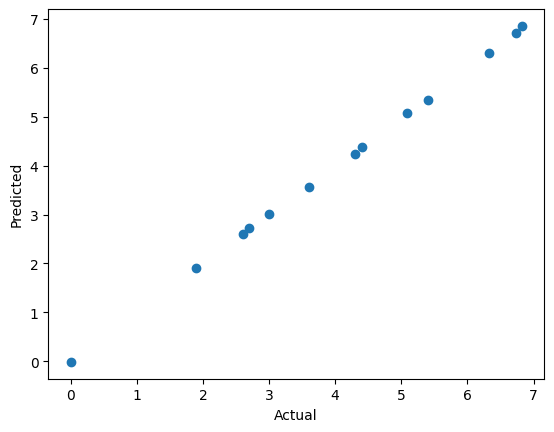

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

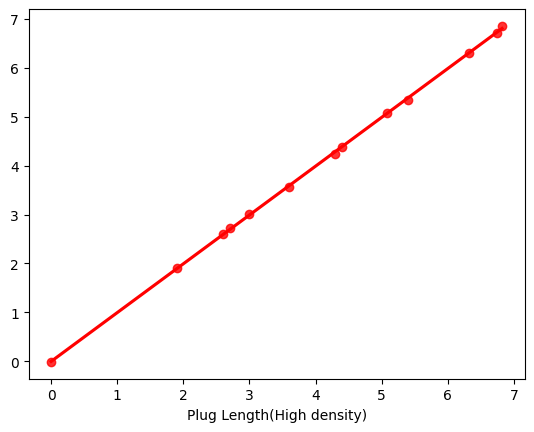

In [18]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
37,5.0800,5.067867,0.012133
19,2.6000,2.597177,0.002823
26,3.6000,3.558001,0.041999
14,1.9000,1.910875,-0.010875
0,0.0000,-0.010773,0.010773
31,4.3000,4.244303,0.055697
49,6.7375,6.714993,0.022507
32,4.4000,4.381564,0.018436
22,3.0000,3.008959,-0.008959
50,6.8200,6.852253,-0.032253
